In [1]:
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
#now copy the api command
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 43.9MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.6MB/s]


### Our dataset is in .zip format. now we will unzip it

In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

# Now we will load the libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

## Now we will use the concept of generators to load the data in batches and at the same time we customize it as well ie label encoding cat = 0 dog =1

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    #cat will be 0 and dog will be 1 but they can be in string

    label_mode = 'int', #for converting them in string
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    #cat will be 0 and dog will be 1 but they can be in string

    label_mode = 'int', #for converting them in string
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### Normalizing the dataset

In [6]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## Creating a CNN model

In [7]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size= (3,3), padding = 'valid', activation= 'relu', input_shape= (256,256,3)))
#padding = if any location misses out it will get filled with zero

model1.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid')),

model1.add(Conv2D(64, kernel_size= (3,3), padding= 'valid', activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid')),

model1.add(Conv2D(128, kernel_size = (3,3), padding= 'valid', activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid')),

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model1.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [10]:
history = model1.fit(train_ds, epochs= 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 90ms/step - loss: 0.5880 - accuracy: 0.6806 - val_loss: 0.5158 - val_accuracy: 0.7494
Epoch 2/10
625/625 [==============================] - 55s 88ms/step - loss: 0.4463 - accuracy: 0.7910 - val_loss: 0.4677 - val_accuracy: 0.7888
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3360 - accuracy: 0.8511 - val_loss: 0.4702 - val_accuracy: 0.7930
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2157 - accuracy: 0.9121 - val_loss: 0.7193 - val_accuracy: 0.7654
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1239 - accuracy: 0.9516 - val_loss: 0.8931 - val_accuracy: 0.7896
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0829 - accuracy: 0.9711 - val_loss: 0.9916 - val_accuracy: 0.7938
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0592 - accuracy: 0.9794 - val_loss: 1.1476 - val_accuracy:

we passed validation_data because we wanted to loss and accuracy for test and training data both in

training acc = 99% and testing acc = 80%
## RESULT = OVERFITTING


In [11]:
import matplotlib.pyplot as plt


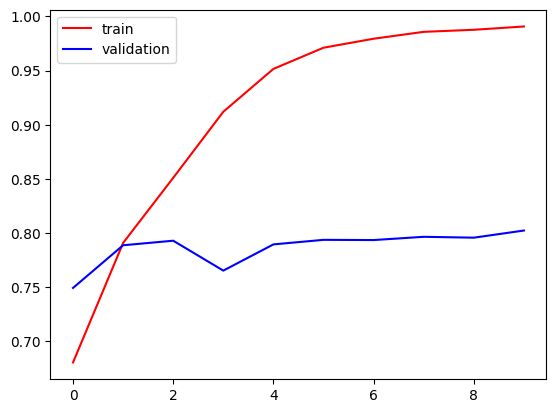

In [12]:
plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

### wrt loss

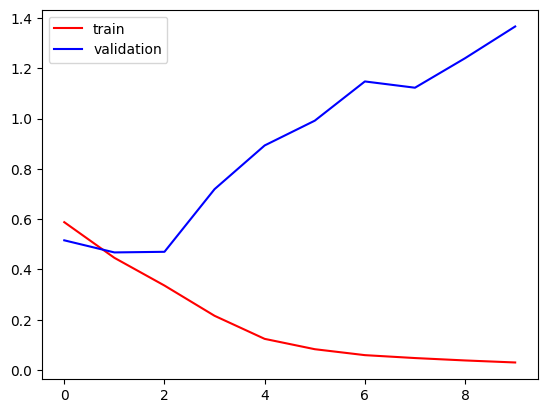

In [14]:
plt.plot(history.history['loss'], color = 'red', label='train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

## Batch Regularization ie regularize our model and dropout

In [15]:
from keras.layers import BatchNormalization, Dropout

In [16]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size= (3,3), padding = 'valid', activation= 'relu', input_shape= (256,256,3)))
#padding = if any location misses out it will get filled with zero
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid')),


model1.add(Conv2D(64, kernel_size= (3,3), padding= 'valid', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid')),

model1.add(Conv2D(128, kernel_size = (3,3), padding= 'valid', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid')),

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation = 'sigmoid'))
#in o/p we layer we dont put dropout layer

Batch normalization is a technique used in the training neural network to make them faster and more stable. it actually make the trainig data mean as 0 and standard deviation as 1
same as normal distribution

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model1.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [19]:
history1 = model1.fit(train_ds, epochs= 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 101ms/step - loss: 1.2105 - accuracy: 0.5638 - val_loss: 0.6963 - val_accuracy: 0.5626
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.6266 - accuracy: 0.6496 - val_loss: 0.5585 - val_accuracy: 0.6768
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5318 - accuracy: 0.7163 - val_loss: 0.5128 - val_accuracy: 0.7520
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4552 - accuracy: 0.7645 - val_loss: 0.4968 - val_accuracy: 0.7592
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4068 - accuracy: 0.7936 - val_loss: 0.4748 - val_accuracy: 0.7800
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3620 - accuracy: 0.8120 - val_loss: 0.4555 - val_accuracy: 0.7778
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3137 - accuracy: 0.8339 - val_loss: 0.6049 - val_ac

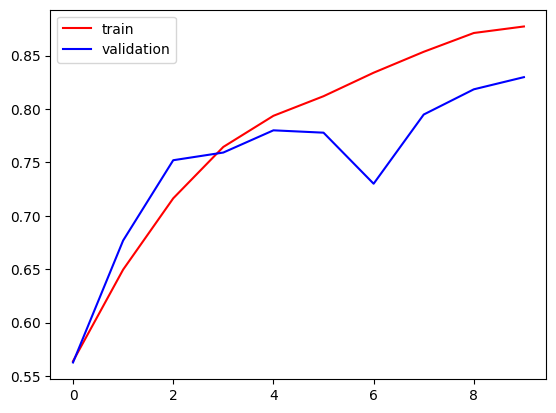

In [23]:
plt.plot(history1.history['accuracy'], color = 'red', label = 'train')
plt.plot(history1.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

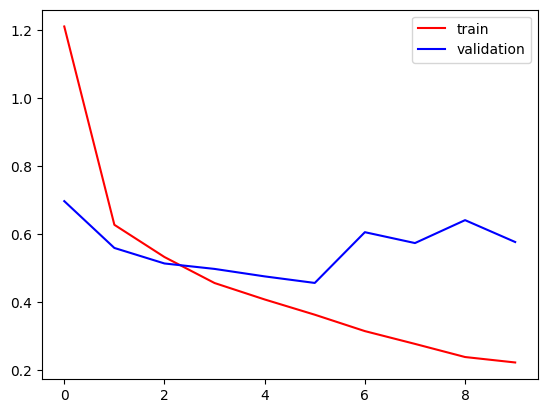

In [24]:
plt.plot(history1.history['loss'], color = 'red', label = 'train')
plt.plot(history1.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

# Conclusion --- after normalization, somehow the model is not very much overfitted

# Object Detection

In [25]:
import cv2

In [26]:
test_img = cv2.imread("/content/dog.jpg")

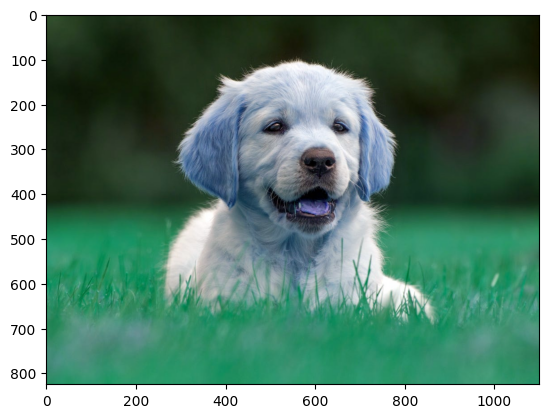

In [27]:
plt.imshow(test_img)
plt.show()

In [28]:
# shape

test_img.shape

(825, 1100, 3)

In [29]:
# the image should be 256,256,3

reshape the image
resize is used to make changes in existing dimensions
reshape used to change the dimensions

In [31]:
test_img = cv2.resize(test_img, (256,256))

In [32]:
test_img.shape

(256, 256, 3)

In [33]:
test_img = test_img.reshape(1,256,256,3)

In [34]:
test_img.shape

(1, 256, 256, 3)

In [35]:
# making some prediction

result = model1.predict(test_img)

1/1 [==============================] - 1s 789ms/step


In [36]:
result

array([[1.]], dtype=float32)

In [37]:
int(result)

<ipython-input-37-baa5c0abe21d>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(result)


1